In [1]:

import matplotlib.pyplot as plt
import numpy as np
import os
import time
import csv
import sys
import math
from keras.callbacks import  EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.optimizers import SGD,RMSprop,Adam
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import pandas as pd
from keras.engine.topology import Layer
from matplotlib.pyplot import axis


Using TensorFlow backend.


In [2]:
def createRNN(input_seq_length, weights_path=None, learningRate=0.001):
    """LSTM model that has 3 LSTM layers with 50 units each and one Dense layer on top.
    Model can predict one time step vector with 5 values;
    The model is tuned for optimizer: optimizer = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    """
    # input_seq_length = 40
    model = Sequential()
    # layers = [41, 20, 20, 16]
    #layers = [41, 50,  16]
    layers = [17, 25,  8]
    print('Creating RNN with Layer Dimensions of :', layers)
    # first layer
    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1], input_length=input_seq_length,
        return_sequences=False, unroll=True))
    '''
    model.add(Dropout(0.2))
    # second layer
    model.add(LSTM(
           layers[2],
           return_sequences=True, unroll=True))

    model.add(Dropout(0.2))
    # third layer
    model.add(LSTM(
           layers[2],
           return_sequences=False, unroll=True))
    model.add(Dropout(0.2))
    '''
    # Dense layer
    model.add(Dense(
        output_dim=layers[2]))  # Changed from 2
    model.add(Activation("linear"))#Changed from linear to Relu (Kamran)
    # Original Values
    optimizer = Adam(lr=learningRate, beta_1=0.9,
                     beta_2=0.999, epsilon=1e-08, decay=0.0)
    # optimizer = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.01)
    # rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    model.compile(loss="mse", optimizer=optimizer)
    print('model compiled...')
    if weights_path:
        model.load_weights(weights_path)
    return model


.\Results\Weights\Integration_30_Models\weights_30_0_0.0002_2000
Creating RNN with Layer Dimensions of : [17, 25, 8]


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, unroll=True, input_shape=(30, 17), units=25)`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8)`


model compiled...
Param <tf.Variable 'lstm_124/kernel:0' shape=(17, 100) dtype=float32_ref>:
     Size = ((17, 100))
lstm_124/kernel:0
Param <tf.Variable 'lstm_124/recurrent_kernel:0' shape=(25, 100) dtype=float32_ref>:
     Size = ((25, 100))
lstm_124/recurrent_kernel:0


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6097: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 25 x 100)
  '(shape is %d x %d)' % inp.shape[::-1])


max=  0.000121243 0.860089


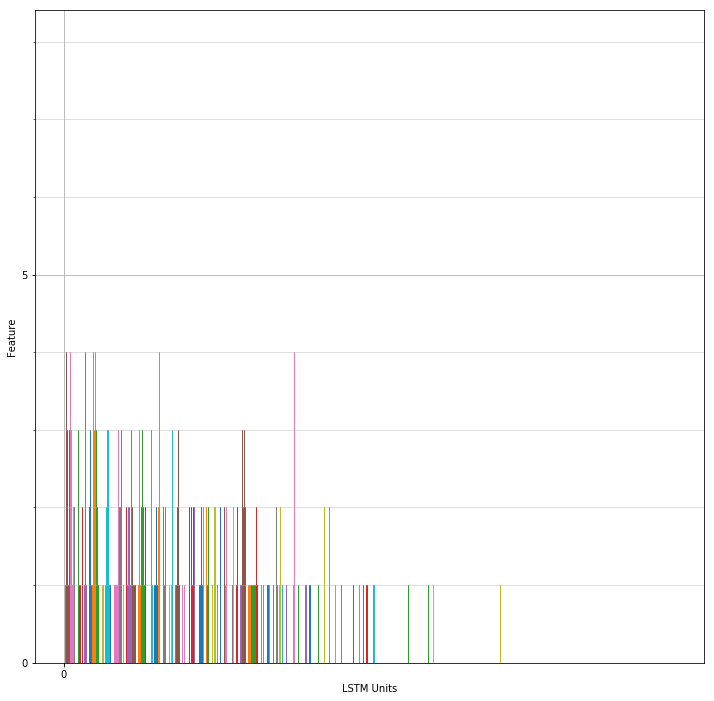

Param <tf.Variable 'lstm_124/bias:0' shape=(100,) dtype=float32_ref>:
     Size = ((100,))
lstm_124/bias:0
.\Results\Weights\Integration_30_Models\weights_30_20_0.0001_2000
Creating RNN with Layer Dimensions of : [17, 25, 8]
model compiled...
Param <tf.Variable 'lstm_125/kernel:0' shape=(17, 100) dtype=float32_ref>:
     Size = ((17, 100))
lstm_125/kernel:0
Param <tf.Variable 'lstm_125/recurrent_kernel:0' shape=(25, 100) dtype=float32_ref>:
     Size = ((25, 100))
lstm_125/recurrent_kernel:0
max=  2.18767e-05 0.521497


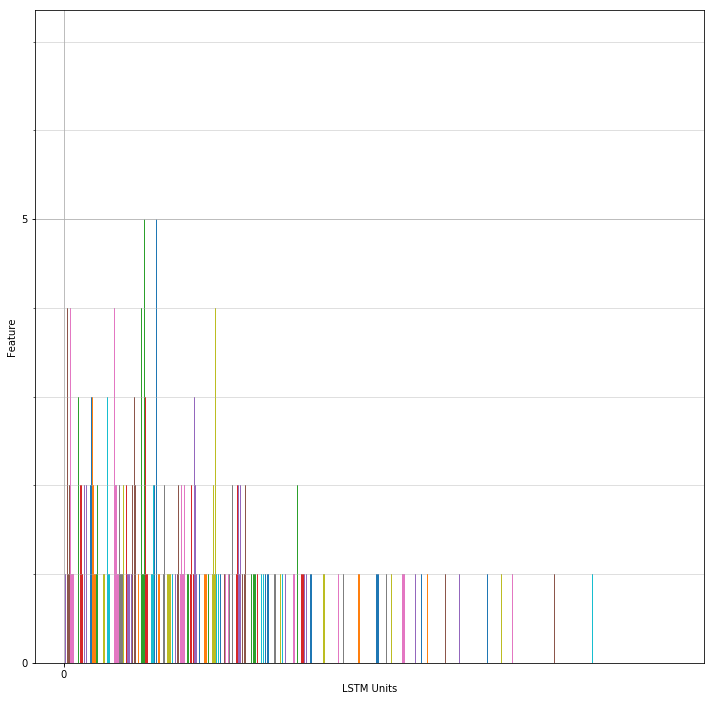

Param <tf.Variable 'lstm_125/bias:0' shape=(100,) dtype=float32_ref>:
     Size = ((100,))
lstm_125/bias:0
.\Results\Weights\Integration_30_Models\weights_30_35_0.0001_2000
Creating RNN with Layer Dimensions of : [17, 25, 8]
model compiled...
Param <tf.Variable 'lstm_126/kernel:0' shape=(17, 100) dtype=float32_ref>:
     Size = ((17, 100))
lstm_126/kernel:0
Param <tf.Variable 'lstm_126/recurrent_kernel:0' shape=(25, 100) dtype=float32_ref>:
     Size = ((25, 100))
lstm_126/recurrent_kernel:0
max=  8.37544e-05 0.477307


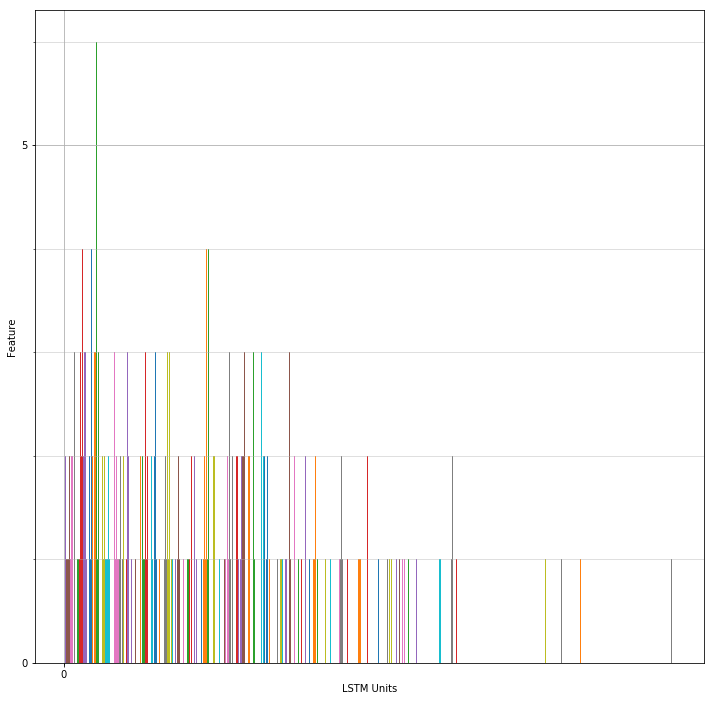

Param <tf.Variable 'lstm_126/bias:0' shape=(100,) dtype=float32_ref>:
     Size = ((100,))
lstm_126/bias:0


In [54]:
imageList = []
timeStepList = [0, 20, 35]
learningRate = [0.0002, 0.0001, 0.0001]
i = 0
for timeStep in timeStepList:
    integrationLength = 30
    
    weights_path = r'.\Results\Weights\Integration_30_Models\weights_' + str(integrationLength) + '_'+str(timeStep)+'_'+str(learningRate[i])+'_2000'
    print(weights_path)    
    model = createRNN(integrationLength, weights_path, learningRate[i])
    model.load_weights(weights_path)
    layerDict = dict([(layer.name,layer) for layer in model.layers])
    #myKeys layerDict.keys():
    #         print(layerDict.keys())
    #         print(len(layerDict['lstm_1'].get_weights()))
    #         for i in range((len(layerDict['lstm_1'].get_weights()))):
    #             print('\n size = ', layerDict['lstm_1'].get_weights()[i].size)
    #         for myKeys in layerDict.keys():
    #             print(layerDict[myKeys])
    for e in zip(model.layers[0].trainable_weights, model.layers[0].get_weights()):
        print('Param %s:\n     Size = (%s)' % (e[0], e[1].shape))
        print((str(e[0].name)))
        if(e[1].shape == (25,100)):
            imageList.append(e[1])
            currentImage =  abs(e[1])
            #print('Done!')
            fig = plt.figure(figsize=(12,12))
            ax = fig.add_subplot(1,1,1)
            # major ticks every 20, minor ticks every 5                                      
            major_ticks = np.arange(0, 100, 5)                                              
            minor_ticks = np.arange(0, 100, 1)                                               

            ax.set_xticks(major_ticks)                                                       
            ax.set_xticks(minor_ticks, minor=True)                                           
            ax.set_yticks(major_ticks)                                                       
            ax.set_yticks(minor_ticks, minor=True)                                           

            # and a corresponding grid                                                       

            ax.grid(which='both')                                                            

            # or if you want differnet settings for the grids:                               
            ax.grid(which='minor', alpha=0.5)                                                
            ax.grid(which='major', alpha=0.9)
            plt.hist(currentImage, 50)
            plt.xlabel('LSTM Units')
            plt.ylabel('Feature')
            #plt.colorbar()
            #plt.clim(currentImage.min(),currentImage.max())
            print('max= ', currentImage.min(), currentImage.max())
            #print((str(e[0].name).split('/'))[1].split(':')[0])
            #print((str(e[0].name).split('/'))[1].split(':')[0] + '_' + str(timeStep) + '_Weights.png')
            #plt.savefig((str(e[0].name).split('/'))[1].split(':')[0] +  '_I_30_'+'P_' + str(timeStep) + '.png', dpi=600)
            plt.show()
    i = i+1


In [4]:
plt
print((model.layers[0].get_weights()[0].shape))

(17, 100)


In [22]:
model.layers[0].trainable_weights

[<tf.Variable 'lstm_2/kernel:0' shape=(17, 100) dtype=float32_ref>,
 <tf.Variable 'lstm_2/recurrent_kernel:0' shape=(25, 100) dtype=float32_ref>,
 <tf.Variable 'lstm_2/bias:0' shape=(100,) dtype=float32_ref>]

In [27]:
for e in zip(model.layers[0].trainable_weights, model.layers[0].get_weights()):
    print(e)

(<tf.Variable 'lstm_2/kernel:0' shape=(17, 100) dtype=float32_ref>, array([[ 0.02510366,  0.2230141 , -0.23088986, ..., -0.07923784,
         0.12346064, -0.04107011],
       [ 0.35755038, -0.04062068, -0.42404428, ..., -0.07397147,
        -0.46524689,  0.02508244],
       [ 0.21659681,  0.14443088,  0.0052704 , ..., -0.2153025 ,
         0.3716737 ,  0.03066503],
       ..., 
       [ 0.07778326,  0.12755577,  0.19578157, ...,  0.15968245,
         0.10131704,  0.04600077],
       [-0.09796406, -0.04907366, -0.03850335, ..., -0.10669026,
        -0.16007248, -0.08434374],
       [-0.18185841,  0.11320207, -0.07284808, ..., -0.02446558,
         0.16223221, -0.05090767]], dtype=float32))
(<tf.Variable 'lstm_2/recurrent_kernel:0' shape=(25, 100) dtype=float32_ref>, array([[ 0.09025244, -0.31449273, -0.42213392, ..., -0.48688099,
        -0.19670662, -0.30846271],
       [-0.11267269, -0.03713343,  0.1418578 , ...,  0.19382469,
         0.00745222,  0.13444774],
       [ 0.15693465, -0.

In [38]:
currentImage.min()

0.00012124283